In [1]:
from lib import Coinimage
from skimage import io
import numpy as np
import cv2 as cv

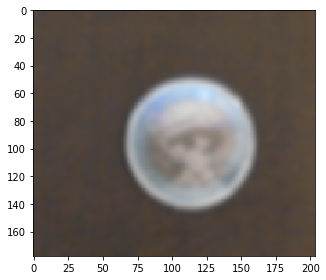

In [2]:
image = cv.imread('./testimages/tmp.png', cv.IMREAD_COLOR)
#coin = Coinimage()
#image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
res = cv.GaussianBlur(image,(9,9),0)
io.imshow(res)

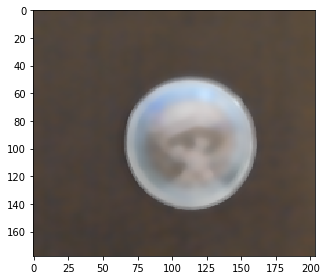

In [3]:
res = cv.bilateralFilter(image, 9,75,75)
io.imshow(res)

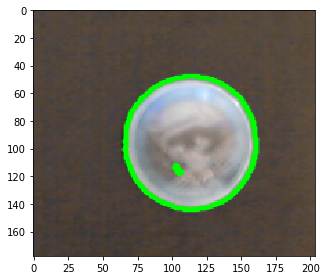

In [4]:
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(grey, 100,255, cv.THRESH_BINARY)
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

# draw contours on the original image
image_copy = image.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv.LINE_AA)

# see the results
cv.imshow('None approximation', image_copy)
io.imshow(image_copy)

# Ansatz zur verwendung der Hafftransformation

In [8]:
image = cv.imread('./testimages/44.png', cv.IMREAD_COLOR)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
src = image.copy()

blured = cv.medianBlur(gray, 5)

rows = gray.shape[0]

In [9]:
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows/8, param1=100, param2=30,minRadius=10)

x=276, y=426, radius=48
x=298, y=216, radius=44
x=312, y=68, radius=39
x=298, y=308, radius=45
x=226, y=122, radius=38
x=190, y=310, radius=46


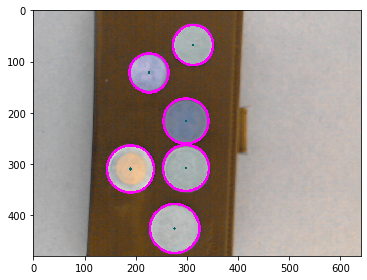

In [10]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        print(f"x={i[0]}, y={i[1]}, radius={i[2]}")
        center = (i[0], i[1])
        # circle center
        cv.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv.circle(src, center, radius, (255, 0, 255), 3)


io.imshow(src)

## bestimmung der durchschnittsfarbe

In [ ]:
circle = circles[0]
coin = image[265:345, 155:225]# hier ist x und y vertauscht warum?
io.imshow(coin)
# evtl noch berücksichtigen -> ausserhalb der Münze Farbe mit neutral gewichten
colorR = np.mean(coin[:,:,0])
colorG = np.mean(coin[:,:,1])
colorB = np.mean(coin[:,:,2])
color = (colorR,colorG,colorB)
color

## entscheiden welche Münze zur Farbe passt